# Monty Hall problem simulation

In [3]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

# The Monty Hall Problem
Here's a fun and perhaps surprising statistical riddle, and a good way to get some practice writing python functions

In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

We can answer the problem by running simulations in Python. We'll do it in several parts.

First, write a function called simulate_prizedoor. 
# This function will simulate the location of the prize in many games -- see the detailed specification below:

In [4]:
"""
Function
--------
simulate_prizedoor

Generate a random array of 0s, 1s, and 2s, representing
hiding a prize between door 0, door 1, and door 2

Parameters
----------
nsim : int
    The number of simulations to run

Returns
-------
sims : array
    Random array of 0s, 1s, and 2s

Example
-------
>>> print simulate_prizedoor(3)
array([0, 0, 2])
"""
# Your code here
def simulate_prizedoor(nsim):
    return np.random.randint(0,3,nsim)


Next, write a function that simulates the contestant's guesses for nsim simulations. Call this function simulate_guess. The specs:

In [5]:
"""
Function
--------
simulate_guess

Return any strategy for guessing which door a prize is behind. This
could be a random strategy, one that always guesses 2, whatever.

Parameters
----------
nsim : int
    The number of simulations to generate guesses for

Returns
-------
guesses : array
    An array of guesses. Each guess is a 0, 1, or 2

Example
-------
>>> print simulate_guess(5)
array([0, 0, 0, 0, 0])
"""
#your code here
def simulate_guess(nsim):
    return np.random.randint(0,3,nsim)

Next, write a function, goat_door, to simulate randomly revealing one of the goat doors that a contestant didn't pick.

In [6]:
"""
Function
--------
goat_door

Simulate the opening of a "goat door" that doesn't contain the prize,
and is different from the contestants guess

Parameters
----------
prizedoors : array
    The door that the prize is behind in each simulation
guesses : array
    THe door that the contestant guessed in each simulation

Returns
-------
goats : array
    The goat door that is opened for each simulation. Each item is 0, 1, or 2, and is different
    from both prizedoors and guesses

Examples
--------
>>> print goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))
>>> array([2, 2, 0])
"""
def goat_door(Prize_door_list, Sim_guess_list):
    aNewList = []
    for i in range(len(Prize_door_list)):
        aList_options = [0,1,2]
        if Prize_door_list[i] == Sim_guess_list[i]:
            aList_options.remove(Prize_door_list[i])
            aNewList.append(np.random.choice(aList_options))
        else:
            (aList_options.remove(Prize_door_list[i]))
            (aList_options.remove(Sim_guess_list[i]))
            aNewList += aList_options
    return np.array(aNewList)
        
print (goat_door(np.array([0, 1, 2]), np.array([1, 1, 1])))    

[2 0 0]


Write a function, switch_guess, that represents the strategy of always switching a guess after the goat door is opened

In [7]:
"""
Function
--------
switch_guess

The strategy that always switches a guess after the goat door is opened

Parameters
----------
guesses : array
     Array of original guesses, for each simulation
goatdoors : array
     Array of revealed goat doors for each simulation

Returns
-------
The new door after switching. Should be different from both guesses and goatdoors

Examples
--------
>>> print switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1]))
>>> array([2, 0, 0])
"""
def switch_guess(guesses_list, goatdoors_list):
    aNewList = []
    for i in range(len(guesses_list)):
        aList_options = [0,1,2]
        aList_options.remove(guesses_list[i])
        aList_options.remove(goatdoors_list[i])
        aNewList += aList_options
    return np.array(aNewList)
  

Last function: write a win_percentage function that takes an array of guesses and prizedoors, and returns the percent of correct guesses

In [8]:
"""
Function
--------
win_percentage

Calculate the percent of times that a simulation of guesses is correct

Parameters
-----------
guesses : array
    Guesses for each simulation
prizedoors : array
    Location of prize for each simulation

Returns
--------
percentage : number between 0 and 100
    The win percentage

Examples
---------
>>> print win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))
33.333
"""
def win_percentage(guesses, prizedoors):
    return 100*((guesses == prizedoors).mean())

win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))    

33.333333333333329

Now, put it together. Simulate 10000 games where contestant keeps his original guess, and 10000 games where the contestant switches his door after a goat door is revealed. Compute the percentage of time the contestant wins under either strategy. Is one strategy better than the other?

Without Switching 33.01
After Switching 66.99


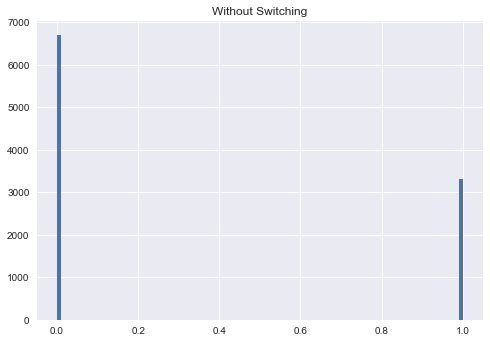

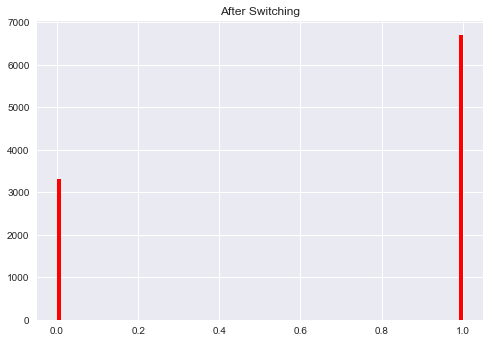

In [13]:
#your code here 
prizeList = simulate_prizedoor(10000)
oldGuess = simulate_guess(10000)
goatList = goat_door(prizeList, oldGuess)
newGuess = switch_guess(oldGuess, goatList)
oldPercentage= win_percentage(prizeList, oldGuess)
newPercentage= win_percentage(prizeList, newGuess)
print('Without Switching' , oldPercentage)  
print('After Switching' , newPercentage)
# Let us Visualise the result using Histogram
t = (prizeList == oldGuess)
s = (prizeList == newGuess)
plt.figure()
plt.hist(t,bins = 100 )
plt.title('Without Switching')
plt.figure()
plt.hist(s, color = 'r', bins = 100)
plt.title('After Switching')

Many people find this answer counter-intuitive (famously, PhD mathematicians have incorrectly claimed the result must be wrong. Clearly, none of them knew Python).

One of the best ways to build intuition about why opening a Goat door affects the odds is to re-run the experiment with 100 doors and one prize. If the game show host opens 98 goat doors after you make your initial selection, would you want to keep your first pick or switch? Can you generalize your simulation code to handle the case of n doors?

In [10]:
plt.hist?
